In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Wisconsin.csv')

In [3]:
data.shape

(569, 32)

In [4]:
# droping the id column since it's irrelevant
data.drop('id', axis = 1, inplace = True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


assigning:
* M as Maligant Tumor to 1
* B as Benign Tumor to 0

In [7]:
df = data.copy()

In [8]:
def cat_to_binary(col):
    if col == "M":
        return 1
    else:
        return 0

In [9]:
df['diagnosis'] = df['diagnosis'].apply(cat_to_binary)

For indexing purposes, separating the features in 3 distinct categories:
* feature_mean
* feature_se (standard error)
* feature_worst 

In [10]:
features_mean = df.columns[1:11]
features_se = df.columns[11:21]
features_worst = df.columns[21:31]
allfeatures = df.columns[1:]
print(features_mean)
print(features_se)
print(features_worst)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Exploratory Data Analysis

1. Diagnosis Distribution

In [ ]:
sns.countplot(x = 'diagnosis', data = df, palette ='RdBu_r')

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_mean].corr(), annot=True)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_worst].corr(), annot=True, cmap='BrBG')

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_se].corr(), annot=True, cmap='RdBu')

Above heatmaps shows high correlation between certain features in all three cases, as follows:
* High correlation between 'radius', 'area', and 'perimeter'
* Relatively high correlation between 'compactness', 'concavity', and 'concave points'

I'll go ahead and remove features with more than .9 correlation, which are:
- perimeter_mean, perimeter_se, perimeter_worst
- area_mean, area_se, area_worst
- concave points_mean

Now let's see the correlation in features for each case 'mean', 'se', 'worst'

In [ ]:
features_mean_2 = features_mean.drop(['perimeter_mean','area_mean','concave points_mean'])
features_se_2 = features_se.drop(['perimeter_se', 'area_se'])
features_worst_2 = features_worst.drop('perimeter_worst','area_worst')
allfeatures_2 = allfeatures.drop(['perimeter_mean','area_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se','perimeter_worst','area_worst'])

In [ ]:
# a feature list made in order to compare each feature in the 3 cases of 'mean', 'se', and 'worst'
features_cat = []
columns_list = np.array(allfeatures)
gen = ([i, i+10, i+20] for i in range(10))
for x in gen:
    features_cat.append(columns_list[x].tolist())

In [ ]:
# let's try it out for the radius
df[features_cat[3]].describe()

In [ ]:
plt.figure(figsize=(16,24))
for i in range(10):
    plt.subplot(5,2,i+1)
    sns.heatmap(df[features_cat[i]].corr(), annot=True)

above heatmaps shows correlation between 'mean' case and the 'worst' case of the following features:
* radius
* texture

I'll drop radius_worst and texture_worst as well

In [ ]:
features_worst_2 = features_worst.drop(['radius_worst', 'texture_worst'])
allfeatures_2 = allfeatures_2.drop(['radius_worst', 'texture_worst'])

Now I have a smaller version of features set which I can use for my calculations and for showing results

Now lets plot a scatter plot for the new features_mean:

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(pd.concat([data.diagnosis,df[features_mean_2]], axis = 1), hue= 'diagnosis', palette='coolwarm')

Last but not least, will check if there is any missing data in the dataset:

# Train Test Split

In [ ]:
df.head()

In [ ]:
df.columns

In [11]:
X = df[allfeatures]

In [12]:
print(X.shape)

(569, 30)


In [13]:
y = df['diagnosis']

In [14]:
y.shape

(569,)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [19]:
print(X.shape, y.shape)

(569, 30) (569,)


In [20]:
score_list = ['accuracy', 'precision', 'recall']

def cross_validate_with_statistics(classifier, X, y):

    scores = cross_validate(classifier, X, y, 
                            cv=KFold(10, shuffle=True, random_state=42), 
                            scoring=score_list, return_train_score=True,
                            )
    
    # get mean and std of 
    means = {s:np.mean(scores[s]) for s in scores}
    stds = {s:np.std(scores[s]) for s in scores}

    return means, stds

In [27]:
def logistic_regression(X, y, cs):
    
    scores_lr = np.zeros((len(cs),3,3))
    
    for i, c in enumerate(cs):
        # instantiate logisitc_regression classifier
        clf = LogisticRegression(C = c)
        # standarize to 0 and 1
        clf = make_pipeline(preprocessing.StandardScaler(), clf)
        lr_means, lr_stds = cross_validate_with_statistics(clf, X, y)

        scores_lr[i,0,0] = lr_means['test_accuracy']
        scores_lr[i,1,0] = lr_means['test_precision']
        scores_lr[i,2,0] = lr_means['test_recall']

        scores_lr[i,0,1] = lr_stds['test_accuracy']
        scores_lr[i,1,1] = lr_stds['test_precision']
        scores_lr[i,2,1] = lr_stds['test_recall']
        
        scores_lr[i,0,2] = lr_means['train_accuracy']
        scores_lr[i,1,2] = lr_means['train_precision']
        scores_lr[i,2,2] = lr_means['train_recall']
        
    return scores_lr

cs = [10**x for x in range(-3,3)]
scores_lr = logistic_regression(X,y, cs)

In [31]:
for i, c in enumerate(cs):
    print("C: {:.3f}".format(c))
    print("Training set score: {:.3f}".format(scores_lr[i, 0, 2]))
    print("Test set score: {:.3f}".format(scores_lr[i, 0, 0]))

C: 0.001
Training set score: 0.948
Test set score: 0.944
C: 0.010
Training set score: 0.969
Test set score: 0.968
C: 0.100
Training set score: 0.985
Test set score: 0.982
C: 1.000
Training set score: 0.989
Test set score: 0.977
C: 10.000
Training set score: 0.990
Test set score: 0.968
C: 100.000
Training set score: 0.991
Test set score: 0.958


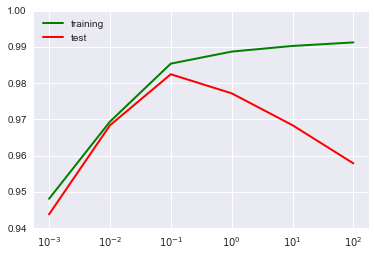

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(cs, scores_lr[:,0,2], color = 'green', lw = 2, label = 'training')
line, = ax.plot(cs, scores_lr[:,0,0], color = 'red' , lw = 2, label = 'test')

ax.legend(loc = 'best')

ax.set_xscale('log')
ax.set_ylim(.94, 1)
ax_

plt.savefig('figs/lr_test_train_plot.pdf')

In [22]:
def lr_plot(lr_res, cs, s):
    
    from matplotlib.ticker import FormatStrFormatter
    
    # precision recall plot
    # recall
    xpl = lr_res[:,2,0]
    # precision
    ypl = lr_res[:,1,0]

    xerr = lr_res[:,2,1]
    yerr = lr_res[:,1,1]

    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.errorbar(xpl, ypl, yerr, xerr, fmt='none', alpha=0.3, elinewidth=0.5)

    plt.scatter(xpl, ypl, c=cs, cmap = 'summer',label='logistic')
    plt.colorbar(format=FormatStrFormatter('%i'), label='$c$')

    plt.plot([0,0.9999,1],[1,1,0], label='ideal', c='gray', alpha=0.8, linewidth=0.5)
    
    for i,c in enumerate(cs):
        plt.annotate(r"$c={}$".format(c), (xpl[i]-0.02 , ypl[i]-0.009))

    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.ylim(0.9, 1.005)
    plt.xlim(0.4, 1.01)
    plt.tight_layout()
    plt.savefig('figs/'+s+'.pdf')

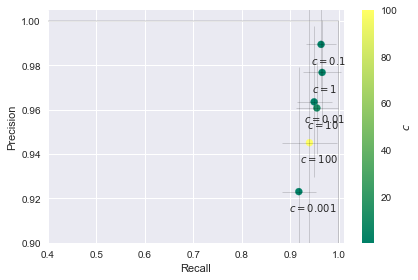

In [23]:
lr_plot(scores_lr, cs, 'logistic_regression')

In [ ]:
for i, c in enumerate(cs):
    print("Training set score: {:.3f}".format(scores_lr[i, 0, 2]))
    print("Training set score: {:.3f}".format(scores_lr[i, 0, 0]))

In [ ]:
df.drop('diagnosis', axis = 1).columns

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)
lr_01 = LogisticRegression().fit(X_train, y_train)
lr_001 = LogisticRegression().fit(X_train, y_train)

plt.plot(lgr.coef_.T,'o',label='C=1')
plt.plot(lgr100.coef_.T,'*',label='C=0.1')
plt.plot(lgr001.coef_.T,'-',label='C=0.01')
plt.xticks(range(df.drop('diagnosis', axis = 1).shape[1]),df.drop('diagnosis', axis = 1).columns,rotation=90)
plt.ylim(-6,6)
plt.legend()
plt.savefig('figs/logistic_coef.pdf')

In [ ]:
######default C=1#####
lgr=LogisticRegression().fit(X_train,y_train)
print("training set score: %f" % lgr.score(X_train, y_train))
print('\n'"test set score: %f" % lgr.score(X_test, y_test))
 
######increase C to 100#####
lgr100=LogisticRegression(C=100).fit(X_train,y_train)
print('\n'"training set score of lgr100: %f" % lgr100.score(X_train, y_train))
print('\n'"test set score of lgr100: %f" % lgr100.score(X_test, y_test))
 
######decrease C to 0.01#####
lgr001=LogisticRegression(C=0.01).fit(X_train,y_train)
print('\n'"training set score of lgr001: %f" % lgr001.score(X_train, y_train))
print('\n'"test set score of lgr001: %f" % lgr001.score(X_test, y_test))
 
import matplotlib.pyplot as plt
plt.plot(lgr.coef_.T,'o',label='C=1')
plt.plot(lgr100.coef_.T,'*',label='C=100')
plt.plot(lgr001.coef_.T,'-',label='C=0.01')
plt.xticks(range(df.drop('diagnosis', axis = 1).shape[1]),df.drop('diagnosis', axis = 1).columns,rotation=90)
plt.ylim(-6,6)
plt.legend()
plt.show()

# LDA & QDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
def LDA(X, y):
    
    scores_lda = np.zeros((3,2))
    # instantiate logisitc_regression classifier
    clf = LinearDiscriminantAnalysis(solver= 'svd', n_components=2)
    # standarize to 0 and 1
    clf = make_pipeline(preprocessing.StandardScaler(), clf)
    lda_means, lda_stds = cross_validate_with_statistics(clf, X, y)

    scores_lda[0,0] = lda_means['test_accuracy']
    scores_lda[1,0] = lda_means['test_precision']
    scores_lda[2,0] = lda_means['test_recall']

    scores_lda[0,1] = lda_stds['test_accuracy']
    scores_lda[1,1] = lda_stds['test_precision']
    scores_lda[2,1] = lda_stds['test_recall']
        
        
    return scores_lda

scores_lda = LDA(X,y)

In [ ]:
scores_lda

In [ ]:
def QDA(X, y):
    
    scores_qda = np.zeros((3,2))
    # instantiate logisitc_regression classifier
    clf = QuadraticDiscriminantAnalysis()
    # standarize to 0 and 1
    clf = make_pipeline(preprocessing.StandardScaler(), clf)
    qda_means, qda_stds = cross_validate_with_statistics(clf, X, y)

    scores_qda[0,0] = qda_means['test_accuracy']
    scores_qda[1,0] = qda_means['test_precision']
    scores_qda[2,0] = qda_means['test_recall']

    scores_qda[0,1] = qda_stds['test_accuracy']
    scores_qda[1,1] = qda_stds['test_precision']
    scores_qda[2,1] = qda_stds['test_recall']
        
        
    return scores_qda

scores_qda = QDA(X,y)

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf = make_pipeline(preprocessing.StandardScaler(), clf)
cross_validate_with_statistics(clf, X, y)

In [ ]:
scores_qda

# 